# Coding Tutorial 10 - Transformer Models and Hugging Face

```
Course: CSCI 5922 Spring 2025, University of Colorado Boulder
TA: Everley Tseng
Email: Yu-Yun.Tseng@colorado.edu
* AI assistant is used in making this tutorial
```

## Overview

Sections:
- Hugging Face introduction
- Model inference: BERT, GPT, and ViT
- Model fine-tuning: BERT for classification

Objectives:
- Learn how to leverage the Hugging Face library resources
- Learn how to load a trained model on Hugging Face and run inference on you data
- Learn how to fine-tune a pre-trained model on Hugging Face for your own task

## Hugging Face

Hugging Face has revolutionized NLP and deep learning by making state-of-the-art AI models easily accessible, reusable, and trainable. Below are the key reasons why Hugging Face is so powerful and useful for students, researchers, and industry professionals. The `transformers` library provides resources in modern AI models, and the `datasets` library provides ready-to-use, well-structured datasets instead of searching the internet for datasets.

The `datasets` library was introduced in Coding Tutorial 9, so in this tutorial, we will focus on the `transformers` library. It is an open-source library that provides pre-trained AI models and various utilities for working with those models. Through three examples, BERT, GPT, and ViT, this tutorial demonstrates loading, evalutating, and fine-tuning models available in `transformers`. Note that many of the the state-of-the-art models are still being added to Hugging Face as new methods are proposed. Through the steps we are about to go through, you are given the opportunity to efficiently setup new and powerful models.

For installation, you need to install the two libraries separately:
```
pip install transformers
pip install datasets
```
Hugging Face also has the [`tokenizers`](https://huggingface.co/docs/tokenizers/en/index) library for fast and effecient tokenization, but you can also use `transformers`'s built-in tokenizers as we did in Coding Tutorial 9. There is the library [`accelerate`](https://huggingface.co/docs/accelerate/en/index) for GPUs & TPUs acceleration. To use these libraries, additional installation is required:
```
pip install tokenizers
pip install accelerate
```

On Colab, `transformers` is pre-installed, so only `datasets` is required for an installation.

In [ ]:
! pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.4/485.4 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.6 MB/s eta 0:00:00


### Transformers Library


[Transformers](https://huggingface.co/docs/transformers/index): To get started, go to the [quick tour](https://huggingface.co/docs/transformers/quicktour) page to explore the Transformer library in Hugging Face and learn about how to use it. The supported models and frameworks are listed in [this page](https://huggingface.co/docs/transformers/index#supported-models-and-frameworks).

To use the model for (1) inference and (2) fine-tuning, use the following tools in this package:
- [Pipeline](https://huggingface.co/docs/transformers/quicktour#pipeline): The pipeline() is the easiest and fastest way to use a pretrained model for inference. You can use the pipeline() out-of-the-box for many tasks across different modalities. Available tasks in `pipelines` are listed in the [index](https://huggingface.co/docs/transformers.js/en/pipelines#available-tasks).
- [AutoTokenizer](https://huggingface.co/docs/transformers/quicktour#autotokenizer): A tokenizer is responsible for preprocessing text into an array of numbers as inputs to a model, and both
- [AutoModel](https://huggingface.co/docs/transformers/quicktour#automodel): Transformers provides a simple and unified way to load pretrained instances.


To further breakdown how to utilize `transformers`, see the steps below:

**Step 1: Pipeline for inference** ([documentation](https://huggingface.co/docs/transformers/main_classes/pipelines#transformers.pipeline))
1. Read about how to call `pipeline`
2. See the list of the existing tasks in the API and documentations. Select a task that you want to run (e.g., `text-classification`)
3. If a model is not specified, a default model is called. To view available models, go to the [Models page](https://huggingface.co/models) on Hugging Face and select the corresponding task (e.g., for `text-classification`, you can find available models by selecting `Text Classification` under `NLP` category).

**Step 2: AutoClasses for fine-tuning** ([documentation](https://huggingface.co/docs/transformers/quicktour#autoclass))
1. First, prepare the dataset for training. Use the class `AutoTokenizer` to create a tokenizer based on the model you are training. You can process your dataset using this tokenizer before feeding it to the model. For the available frameworks (e.g., PyTorch, Tensorflow), select one that applies.
2. To load the model, use `AutoModel` to load the pretrained off-the-shelf model in either PyTorch or Tensorflow, and use the tokenized data to fine-tune the model.

## Model Inference

Now, we will explore using the **trained models** on Hugging Face through three examples.

### Sentiment Analysis - BERT

In Coding Tutorial 9, we trained a model on the IMDB dataset for text classification. In `pipeline`, this task is called **text classification** or **sentiment analysis**. To build a sentiment analysis pipeline, use [`pipeline(task="text-classification")`](https://huggingface.co/docs/transformers/v4.38.2/en/main_classes/pipelines#transformers.TextClassificationPipeline) or `pipeline(task="sentiment-analysis")`. Through the [tasks index](https://huggingface.co/docs/transformers.js/en/pipelines#available-tasks), you can find the **text classification** row. You are able to see the pipeline document through the "doc" link, and you can see the available models through the ["models" link](https://huggingface.co/models?pipeline_tag=text-classification&library=transformers.js). All models in this link can be loaded to the text classification pipeline.

To use the default model, you can simply load the pipeline without a model specification:
```
default_pipe = pipeline("text-classification")
```

We'll be using the base BERT model: [`nlptown/bert-base-multilingual-uncased-sentiment`](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) in this example. To do so, we can specify the model by `model=nlptown/bert-base-multilingual-uncased-sentiment`. You are encouraged to try loading other models as well. Don't forget that there are plenty of models available in the "models" link, and they will likely keep growing as new models are proposed.

In the model documentation, it says the model is trained on six languages for sentiment prediction of the review as a number of stars (between 1 and 5).

In [ ]:
from transformers import pipeline

classifier = pipeline('sentiment-analysis', model='nlptown/bert-base-multilingual-uncased-sentiment')
print(classifier('I am happy today!'))

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cuda:0


[{'label': '5 stars', 'score': 0.7161960601806641}]


In [ ]:
print(classifier('It wasn\'t very clean..'))
print(classifier('Fantastic experience'))
print(classifier('I will never come back here'))
print(classifier('Acceptable for this price'))

[{'label': '2 stars', 'score': 0.5010057687759399}]
[{'label': '5 stars', 'score': 0.8062613010406494}]
[{'label': '1 star', 'score': 0.4826505780220032}]
[{'label': '4 stars', 'score': 0.5069335699081421}]


That was very fast and easy, right? The Hugging Face libraries integrate the deep learning frameworks and provide pipelines with high accessibility for us. Without having to build anything in PyTorch, we were able to get this model running!

### Text Generation - GPT

For the second task, let's try inference text generation! Again, find `text-generation` in the [pipeline index](https://huggingface.co/docs/transformers.js/en/pipelines#available-tasks), and see what models are available through the ["models" link](https://huggingface.co/models?pipeline_tag=text-generation&library=transformers.js).

Let's try loading the GPT model, [`openai-gpt`](https://huggingface.co/openai-community/openai-gpt).

In [ ]:
model_generate = pipeline('text-generation', model='openai-gpt')
print(model_generate('Today is a sunny day'))

config.json:   0%|          | 0.00/656 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/479M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/74.0 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/816k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/458k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.27M [00:00<?, ?B/s]

Device set to use cuda:0


[{'generated_text': "Today is a sunny day and no one's around to complain. we had better run before you get a ticket. we have to get to the bank, we're leaving in half an hour and can't wait until this whole thing is over. '"}]


In [ ]:
print(model_generate('I went grocery shopping yesterday and'))
print(model_generate('Taking a deep learning course in graduation school can be beneficial'))
print(model_generate('It snows in Boulder a lot, but'))

[{'generated_text': 'I went grocery shopping yesterday and got breakfast. " \n " you hungry? " \n " oh, yes. i was thinking of a big breakfast, pancakes and bacon, if you think about it. " \n he stopped walking and smiled at her.'}]
[{'generated_text': 'Taking a deep learning course in graduation school can be beneficial. " \n he smiles at his grandmother. " that\'s what i am talking about! i just can\'t picture it. you must have read the book he gave it to you. " \n'}]
[{'generated_text': "It snows in Boulder a lot, but not like this. i can hear the snow crunching in the snow and hear the wind whipping up from the south. i don't take off the gloves. when it gets dark at dusk, and this snow is"}]


### Image Classification - ViT

config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

Fast image processor class <class 'transformers.models.vit.image_processing_vit_fast.ViTImageProcessorFast'> is available for this model. Using slow image processor class. To use the fast image processor class set `use_fast=True`.
Device set to use cuda:0


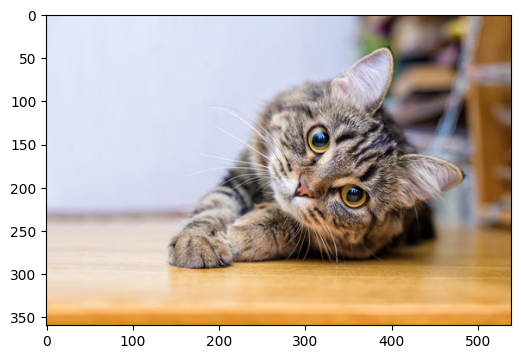

[{'label': 'tabby, tabby cat', 'score': 0.7222110629081726}, {'label': 'tiger cat', 'score': 0.1636933535337448}, {'label': 'Egyptian cat', 'score': 0.06653887778520584}, {'label': 'Persian cat', 'score': 0.030039170756936073}, {'label': 'lynx, catamount', 'score': 0.006520950235426426}]


In [ ]:
vit_classifier = pipeline("image-classification", model="google/vit-base-patch16-224")

from PIL import Image
import requests
import matplotlib.pyplot as plt

# Try different images below
url = 'https://t3.ftcdn.net/jpg/02/36/99/22/360_F_236992283_sNOxCVQeFLd5pdqaKGh8DRGMZy7P4XKm.jpg'
# url = 'http://farm9.staticflickr.com/8040/7928721018_0b26a5b000_z.jpg'
# url = 'http://farm4.staticflickr.com/3730/9455431370_d8b61be4e4_z.jpg'
# url = 'http://farm5.staticflickr.com/4095/4886266871_949e713af3_z.jpg'
# url = 'https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/cat.png'

image = Image.open(requests.get(url, stream=True).raw)
result = vit_classifier(image)
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.show()
print(result)

## Model Fine-Tuning

All of the above models are trained on specific tasks and data. While convenient, these trained models might not always fit our needs. To train a model for our desired tasks, we can **fine-tune** the pre-trained models. Below, we demonstrate how to fine-tune a model.
- Model: Take the [base BERT model](https://huggingface.co/google-bert/bert-base-cased) for fine-tuning
- Dataset: Fine-tune the model on this [emotion dataset](https://huggingface.co/datasets/dair-ai/emotion) for six emotions, joy, sadness, anger, fear, love, and surprise.

In [ ]:
import datasets

dataset = datasets.load_dataset('dair-ai/emotion')

README.md:   0%|          | 0.00/9.05k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/1.03M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/127k [00:00<?, ?B/s]

test-00000-of-00001.parquet:   0%|          | 0.00/129k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

To train the model, you need to prepare your dataset using `AutoTokenizer`. Read about tokenizers and available options [here](https://huggingface.co/docs/transformers/v4.38.2/en/tokenizer_summary). `AutoTokenizer` returns tokenized data for model training and validation. See the documentation for coding examples (like the one below, copied from there).

```
from transformers import AutoTokenizer

model_name = "nlptown/bert-base-multilingual-uncased-sentiment"
tokenizer = AutoTokenizer.from_pretrained(model_name)

encoding = tokenizer("We are very happy to show you the 🤗 Transformers library.")
print(encoding)
```

In [ ]:
from transformers import AutoTokenizer

model_name = 'google-bert/bert-base-cased'
tokenizer = AutoTokenizer.from_pretrained(model_name)

def preprocess_data(data):
    return tokenizer(data['text'], padding='max_length', truncation=True, max_length=128)

train_dataset = dataset['train'].map(preprocess_data, batched=True)
test_dataset = dataset['test'].map(preprocess_data, batched=True)

# Create subset of train and test
train_dataset_subset = train_dataset.select([i for i in range(1000)])
test_dataset_subset = test_dataset.select([i for i in range(500)])

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Follow this [fine-tuning tutorial](https://huggingface.co/docs/transformers/en/training) to load the pretrained model, setup training arguments, and train the model. You will need `TrainingArguments` and `Trainer` from `transformers` for fine-tuning, and the Hugging Face library `evaluate` helps with evaluation setup.

In [ ]:
! pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.8 MB/s eta 0:00:00


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
import evaluate
import numpy as np

# Turn off wandb (you can skip this if you have a wandb account)
import os
os.environ['WANDB_DISABLED'] = 'true'

# Load model
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=6)

# For evaluation, add the argmax step
metric = evaluate.load('accuracy')
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Training arguments
n_epochs = 3
training_args = TrainingArguments(output_dir='test_trainer',
                                  evaluation_strategy='epoch',
                                  logging_strategy='epoch',
                                  num_train_epochs=n_epochs,
                                  report_to='none')

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset_subset,
    eval_dataset=test_dataset_subset,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

# Evaluate the model
results = trainer.evaluate()
print("Evaluation Results:", results)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.389500,0.859435,0.728000
2,0.601200,0.615677,0.818000
3,0.239600,0.547659,0.848000


Evaluation Results: {'eval_loss': 0.5476592779159546, 'eval_accuracy': 0.848, 'eval_runtime': 3.4037, 'eval_samples_per_second': 146.899, 'eval_steps_per_second': 18.509, 'epoch': 3.0}


The model performs very well within three epochs of training! This highlights the advantages **fine-tuning** brings us. Given a better starting point for model parameters, we can save time and computing resources on training.

Fine-tuning is also particularly useful for smaller datasets. Note that we only used **1000** samples from the dataset to train this model, yet, the performance on the test set is still over 80\% after three epochs. Since the model was pre-trained on large-scale datasets, it has already learned general language representations. This allows our model to adapt quickly to our specific task with minimal training data while still achieving strong performance. By leveraging transfer learning, we benefit from the knowledge embedded in the pre-trained model, reducing the need for extensive data collection and computational power.

You can increase the epochs `n_epochs` and explore this factor impacts model performance.

## Review

Hugging Face is a resource-rich platform for NLP, computer vision, and other deep learning tasks. Many developers integrate their newly proposed algorithms to Hugging Face, so **the available models are constantly growing**. For practice, we recommend browsing the model collection on Hugging Face, find a task you are interested in, and load a **recent model** (posted within 2 years), and run inference on random samples.

For any questions and discussions regarding this tutorial, attend [TA office hours](https://docs.google.com/spreadsheets/d/1fzfTJpEF7RaUYRA_NGa3DkiazdQXVj7QNBbp6DrEZ3I/edit?usp=sharing) or create a post on [Piazza](https://piazza.com/colorado/spring2025/csci5922/home) :) See you in the next tutorial!

\- Everley